In [44]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import mat73

mat_contents = mat73.loadmat('./DukeTurtle_test.mat')
mat_contents_out = sio.loadmat('./DukeTurtle_test_cnnClass.mat')

In [45]:
print(sorted(mat_contents.keys()), '\n', sorted(mat_contents_out.keys()))

['features', 'labelNames', 'labels'] 
 ['__globals__', '__header__', '__version__', 'clab', 'p']


In [46]:
for key in mat_contents_out.keys():
    print(key, ": ", mat_contents_out[key])    

__header__ :  b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Nov 20 17:14:13 2023'
__version__ :  1.0
__globals__ :  []
p :  [[0.5002727  0.4997273 ]
 [0.50087184 0.49912816]
 [0.49994725 0.50005275]
 ...
 [0.5007624  0.4992376 ]
 [0.50035626 0.49964374]
 [0.50132316 0.49867687]]
clab :  ['0             ' 'Certain Turtle']


In [47]:
print(len(mat_contents['labels']),  len(mat_contents_out['p']))

1564 1564


This gives us understanding about what exact columns we have to compare. Input data consists of 1564 images-labels, output for each image after running it through CNN is the probability of that image containing a turtle that is stored in the probability array.

In [48]:
mat_contents_out['p']

array([[0.5002727 , 0.4997273 ],
       [0.50087184, 0.49912816],
       [0.49994725, 0.50005275],
       ...,
       [0.5007624 , 0.4992376 ],
       [0.50035626, 0.49964374],
       [0.50132316, 0.49867687]], dtype=float32)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(target, prediction):
    """
    Evaluate a machine learning model.

    Parameters:
    - target: original labels
    - prediction: output of the model

    Returns:
    - Dictionary containing various evaluation metrics
    """

    # Calculate evaluation metrics
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction)
    recall = recall_score(target, prediction)
    f1 = f1_score(target, prediction)
    confusion_mat = confusion_matrix(target, prediction)

    # Create a dictionary to store the results
    evaluation_results = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_mat
    }

    # Print or log the results
    print("Evaluation Results:")
    for metric, value in evaluation_results.items():
        if metric == 'Confusion Matrix':
            disp = ConfusionMatrixDisplay(confusion_matrix=value, display_labels=[0, 1])
            disp.plot()
            plt.show()
        else:
            print(f"{metric}: {value}")    


    return evaluation_results

Evaluation Results:
Accuracy: 0.8797953964194374
Precision: 0.07317073170731707
Recall: 0.0196078431372549
F1 Score: 0.03092783505154639


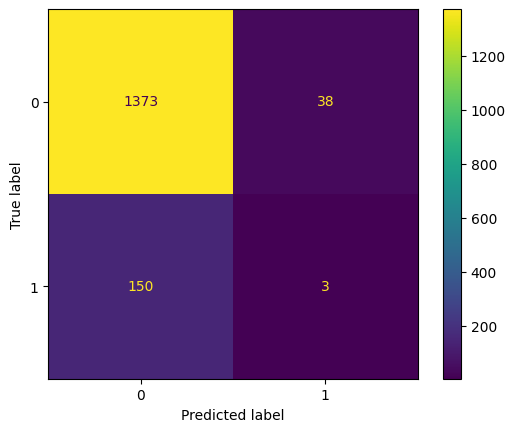

In [59]:
final_labels = []
for p_values in mat_contents_out['p']:
    if p_values[1] > p_values[0]:
        final_labels.append(1)
    else:
        final_labels.append(0)   

evaluation_results = evaluate_model(mat_contents['labels'], final_labels)            

This output has allowed us to formulate initial assumptions and hypothesis about how we could improve existing solution without "reinventing the bicycle". After passing binary containing information about the data through the pretrained model, we were able to see that obtained results are similar to the ones described in the paper, although precision and recall are much lower than the final results mentioned.

This allowed us to formulate three hypothesis on how we could improve result of this research to target our goals:
<br>
1\) **Coping with data imbalance**: Applying well-known techniques to the existing model without the need to change the architecture of it could have a feasible impact on the results (data augmentation, weighted loss function, label smoothing and cleaning, model regularization and evaluation)
<br>
2\) **Architecture improvements**: Modifying the architecture of existing CNN in a way that it is more focused on the small object detection tasks (Smart downsampling using "Projector Network"; YOLO with scaling, convolution dilation with avoidance of pooling layers)
<br>
3\) **State of the art 2023**: Verifying the results that can be achieved using a state-of-the-art image segmentation model that aims to change the field of computer vision - Segment Anything Model (SAM)